<a href="https://colab.research.google.com/github/M-saber31/Tammathon_Code/blob/main/Cat_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cat Recognition Model
A model to recognize cat identities from images.

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
tammathon_task_1_path = kagglehub.competition_download('tammathon-task-1')

print(f"Data saved to: {tammathon_task_1_path}")

print('Data source import complete.')

100%|██████████| 39.1G/39.1G [04:54<00:00, 143MB/s]

Extracting files...


Data saved to: /root/.cache/kagglehub/competitions/tammathon-task-1
Data source import complete.


In [ ]:
# Install necessary packages
!pip install torch torchvision tqdm matplotlib scikit-learn pandas timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [ ]:
# Import libraries
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import timm
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score

In [ ]:
# Setup device for GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} for training")

Using cuda for training


In [ ]:
# Load the CSV files
train_df = pd.read_csv('/root/.cache/kagglehub/competitions/tammathon-task-1/train.csv')
valid_df = pd.read_csv('/root/.cache/kagglehub/competitions/tammathon-task-1/val.csv')

# Display dataset info
print(f"Train dataset: {train_df.shape}")
print(f"Validation dataset: {valid_df.shape}")
print(f"Number of unique labels in train: {train_df['label'].nunique()}")
print(f"Number of unique labels in validation: {valid_df['label'].nunique()}")

Train dataset: (405033, 2)
Validation dataset: (56748, 2)
Number of unique labels in train: 113592
Number of unique labels in validation: 16425


In [ ]:
# Define paths to train and validation directories
TRAIN_DIR = '/root/.cache/kagglehub/competitions/tammathon-task-1/train'
VALID_DIR = '/root/.cache/kagglehub/competitions/tammathon-task-1/val'

# Combine all unique labels from train and validation datasets
all_labels = sorted(set(train_df['label'].unique()).union(set(valid_df['label'].unique())))

# Create label-to-index and index-to-label mappings
label_to_idx = {label: idx for idx, label in enumerate(all_labels)}
idx_to_label = {idx: label for label, idx in label_to_idx.items()}

Label to Index Mapping: {np.int64(0): 0, np.int64(1): 1, np.int64(2): 2, np.int64(3): 3, np.int64(4): 4, np.int64(5): 5, np.int64(6): 6, np.int64(7): 7, np.int64(8): 8, np.int64(9): 9, np.int64(10): 10, np.int64(11): 11, np.int64(12): 12, np.int64(13): 13, np.int64(14): 14, np.int64(15): 15, np.int64(16): 16, np.int64(17): 17, np.int64(18): 18, np.int64(19): 19, np.int64(20): 20, np.int64(21): 21, np.int64(22): 22, np.int64(23): 23, np.int64(24): 24, np.int64(25): 25, np.int64(26): 26, np.int64(27): 27, np.int64(28): 28, np.int64(29): 29, np.int64(30): 30, np.int64(31): 31, np.int64(32): 32, np.int64(33): 33, np.int64(34): 34, np.int64(35): 35, np.int64(36): 36, np.int64(37): 37, np.int64(38): 38, np.int64(39): 39, np.int64(40): 40, np.int64(41): 41, np.int64(42): 42, np.int64(43): 43, np.int64(44): 44, np.int64(45): 45, np.int64(46): 46, np.int64(47): 47, np.int64(48): 48, np.int64(49): 49, np.int64(50): 50, np.int64(51): 51, np.int64(52): 52, np.int64(53): 53, np.int64(54): 54, np.in

In [ ]:
# Dataloader Class
class CatDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx]['filename']
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        label = self.dataframe.iloc[idx]['label']
        label_idx = label_to_idx[label]

        if self.transform:
            image = self.transform(image)

        return image, label_idx

In [ ]:
# Define transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Create datasets and data loaders
train_dataset = CatDataset(train_df, TRAIN_DIR, transform=train_transforms)
valid_dataset = CatDataset(valid_df, VALID_DIR, transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size=256, shuffle=False, num_workers=4)

In [ ]:
# Define the model
def get_model(model_name='efficientnet_b0', pretrained=True, num_classes=len(label_to_idx)):
    model = timm.create_model(model_name, pretrained=pretrained) # Using timm library to get the model
    in_features = model.classifier.in_features # Changing the classifier for new number of classes
    model.classifier = nn.Linear(in_features, num_classes)
    return model

model = get_model()
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

In [ ]:
# Define training and validation functions
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(dataloader, desc="Training"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total

    return epoch_loss, epoch_acc

def validate_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    top3_correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc="Validation"):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)

            # Get top-3 predictions
            _, top3_preds = torch.topk(outputs, k=3, dim=1)

            # Check if true label is in top-3 predictions
            for i, label in enumerate(labels):
                if label in top3_preds[i]:
                    top3_correct += 1

            # For top-1 accuracy
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            total += labels.size(0)

    epoch_loss = running_loss / total
    top1_acc = accuracy_score(all_labels, all_preds)
    top3_acc = top3_correct / total

    return epoch_loss, top1_acc, top3_acc

In [ ]:
# Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

num_epochs = 20
best_top3_acc = 0.0
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_top1_acc': [], 'val_top3_acc': []}

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_top1_acc, val_top3_acc = validate_epoch(model, valid_loader, criterion, device)

    # Update learning rate based on validation loss
    scheduler.step(val_loss)

    # Save best model based on top-3 accuracy
    if val_top3_acc > best_top3_acc:
        best_top3_acc = val_top3_acc
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"Model saved with top-3 accuracy: {best_top3_acc:.4f}")

    # Log metrics
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_top1_acc'].append(val_top1_acc)
    history['val_top3_acc'].append(val_top3_acc)

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Top-1 Acc: {val_top1_acc:.4f}, Val Top-3 Acc: {val_top3_acc:.4f}")
    print("-" * 50)

torch.save(model.state_dict(), 'final_model.pth')
print("Final model saved.")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.6542, Train Acc: 0.8679
Val Loss: 21.4315, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 2/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.2645, Train Acc: 0.9297
Val Loss: 22.1472, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 3/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.2193, Train Acc: 0.9349
Val Loss: 22.2925, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 4/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.2005, Train Acc: 0.9367
Val Loss: 22.6106, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 5/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.1521, Train Acc: 0.9411
Val Loss: 22.6079, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 6/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.1417, Train Acc: 0.9407
Val Loss: 22.5752, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 7/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.1387, Train Acc: 0.9410
Val Loss: 22.3544, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 8/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.1172, Train Acc: 0.9444
Val Loss: 22.3386, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 9/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.1133, Train Acc: 0.9439
Val Loss: 22.2563, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 10/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.1125, Train Acc: 0.9436
Val Loss: 22.0918, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 11/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.1008, Train Acc: 0.9478
Val Loss: 22.1008, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 12/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.0997, Train Acc: 0.9469
Val Loss: 22.0570, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 13/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.0991, Train Acc: 0.9471
Val Loss: 21.9093, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 14/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.0930, Train Acc: 0.9508
Val Loss: 21.7804, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 15/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.0926, Train Acc: 0.9506
Val Loss: 21.8904, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 16/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.0922, Train Acc: 0.9509
Val Loss: 21.8102, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 17/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.0891, Train Acc: 0.9536
Val Loss: 21.7670, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 18/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.0890, Train Acc: 0.9535
Val Loss: 21.8768, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 19/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.0885, Train Acc: 0.9541
Val Loss: 21.6949, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Epoch 20/20


Training:   0%|          | 0/1583 [00:00<?, ?it/s]

Validation:   0%|          | 0/222 [00:00<?, ?it/s]

Train Loss: 0.0871, Train Acc: 0.9558
Val Loss: 21.7989, Val Top-1 Acc: 0.0000, Val Top-3 Acc: 0.0000
--------------------------------------------------
Final model saved.


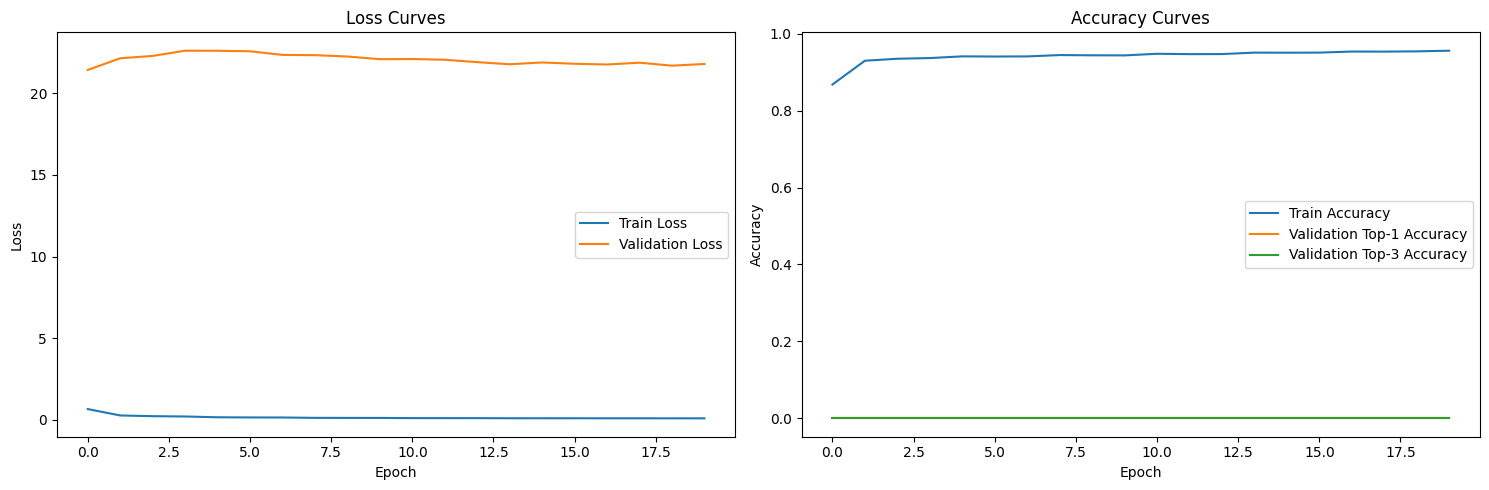

In [ ]:
# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_top1_acc'], label='Validation Top-1 Accuracy')
plt.plot(history['val_top3_acc'], label='Validation Top-3 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# for the testing dataset
from torchvision import transforms, models, datasets

class CatFaceDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx]['filename']
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        # label = self.dataframe.iloc[idx]['label']
        # label_idx = label_to_idx[label]

        if self.transform:
            image = self.transform(image)

        return image, img_name


In [ ]:
# Read the test CSV file into a Pandas DataFrame
test_df = pd.read_csv("/root/.cache/kagglehub/competitions/tammathon-task-1/test.csv")


test_dataset = CatFaceDataset(
    dataframe=test_df,  # Pass the DataFrame instead of csv_file
    img_dir="/root/.cache/kagglehub/competitions/tammathon-task-1/test",  # Use img_dir instead of root_dir
    transform=val_transforms
)

# Create test dataloader
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=4)

In [ ]:
# Load the trained model
model.load_state_dict(torch.load('final_model.pth'))
model.eval()

# Generate predictions for the test set
predictions = []

with torch.no_grad():
    for images, img_names in tqdm(test_loader, desc="Generating predictions"):
        images = images.to(device)
        outputs = model(images)

        # Get top-3 predictions
        probs, indices = torch.topk(outputs, k=3, dim=1)

        # Convert to actual labels
        batch_top3_labels = []
        for i in range(indices.shape[0]):
            top3_labels = [idx_to_label[idx.item()] for idx in indices[i]]
            batch_top3_labels.append(top3_labels)

        # Store results
        for i, img_name in enumerate(img_names):
            predictions.append({
                'image': img_name,
                'prediction_1': batch_top3_labels[i][0],
                'prediction_2': batch_top3_labels[i][1],
                'prediction_3': batch_top3_labels[i][2]
            })

# Create submission dataframe
submission_df = pd.DataFrame(predictions)
submission_df.to_csv('submission.csv', index=False)
print(f"Submission file created with {len(submission_df)} predictions")

Generating predictions:   0%|          | 0/444 [00:00<?, ?it/s]

Submission file created with 113592 predictions


In [ ]:
# Load the trained model
model.load_state_dict(torch.load('final_model1.pth'))  # Replace with 'best_model.pth' if needed
model.eval()
print("Model loaded successfully.")

# Define the test dataset class
class TestDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_files = [f for f in os.listdir(img_dir) if f.endswith('.png')]  # Adjust extensions if needed

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_name = self.img_files[idx]
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, img_name

# Define the test directory and transformations
TEST_DIR = '/root/.cache/kagglehub/competitions/tammathon-task-1/test'  # Ensure this directory contains your test images
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the test dataset and DataLoader
test_dataset = TestDataset(TEST_DIR, transform=val_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Generate predictions for the test set
predictions = []

with torch.no_grad():
    for images, img_names in tqdm(test_loader, desc="Generating predictions"):
        images = images.to(device)
        outputs = model(images)

        # Get top-3 predictions
        probs, indices = torch.topk(outputs, k=3, dim=1)

        # Convert to actual labels
        batch_top3_labels = []
        for i in range(indices.shape[0]):
            top3_labels = [idx_to_label[idx.item()] for idx in indices[i]]
            batch_top3_labels.append(top3_labels)

        # Store results
        for i, img_name in enumerate(img_names):
            predictions.append({
                'image': img_name,
                'prediction_1': batch_top3_labels[i][0],
                'prediction_2': batch_top3_labels[i][1],
                'prediction_3': batch_top3_labels[i][2]
            })

# Create the submission DataFrame
submission_df = pd.DataFrame(predictions)
submission_df.to_csv('submission.csv', index=False)
print(f"Submission file created with {len(submission_df)} predictions")

Model loaded successfully.


Generating predictions: 0it [00:00, ?it/s]

Submission file created with 0 predictions


In [ ]:
print(f"Test dataset size: {len(test_dataset)}")

Test dataset size: 0


In [ ]:
print(f"TEST_DIR: {TEST_DIR}")

TEST_DIR: /root/.cache/kagglehub/competitions/tammathon-task-1/test
